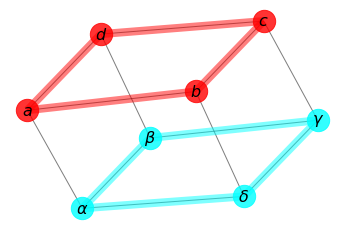

In [18]:
# Author: Aric Hagberg (hagberg@lanl.gov)
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes
#pos = {x: (x, x) for x in range(8)}

# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='cyan',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='cyan')


# some math labels
labels = {}
labels[0] = r'$a$'
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

In [4]:
nx.spring_layout(G)

{0: array([-0.94641699,  0.03245158]),
 1: array([-0.52261559, -0.79090417]),
 2: array([-0.13180404,  0.24520064]),
 3: array([-0.5161072,  1.       ]),
 4: array([ 0.13485753, -0.2512026 ]),
 5: array([0.52154263, 0.79131335]),
 6: array([ 0.94314667, -0.0274163 ]),
 7: array([ 0.517397 , -0.9994425])}

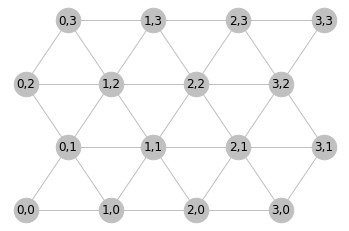

In [165]:
G = nx.triangular_lattice_graph(3, 6)
pos = {key: data['pos'] for (key, data) in G.nodes.items()}
labels = {key: '{0},{1}'.format(*key) for key in G.nodes}

nx.draw_networkx_nodes(G, pos, node_color='silver', node_size=600)
nx.draw_networkx_edges(G, pos, edge_color='silver')
nx.draw_networkx_labels(G, pos, labels, font_color='black', font_size=12)

plt.axis('off')
plt.show()

In [183]:
list(nx.algorithms.boundary.edge_boundary(G, [(0, 0), (0, 1), (1, 0), (3, 3)]))

[((0, 1), (1, 1)),
 ((0, 1), (0, 2)),
 ((0, 1), (1, 2)),
 ((1, 0), (2, 0)),
 ((1, 0), (1, 1)),
 ((3, 3), (2, 3)),
 ((3, 3), (3, 2))]

In [167]:
import math

def theta(pos1, pos2):
    (x1, y1), (x2, y2) = pos1, pos2
    return math.atan2(y2 - y1, x2 - x1)

P = nx.PlanarEmbedding(G)

for node_id in P.nodes:
    pos1 = P.nodes[node_id]['pos']
    n2_ids = list(P.neighbors(node_id))
    n2_ids.sort(key=lambda p2: theta(pos1, P.nodes[p2]['pos']))
    for (n2_id, ref2_id) in zip(n2_ids, [None] + n2_ids):
        P.add_half_edge_ccw(node_id, n2_id, ref2_id)

P.check_structure()

In [182]:
P.traverse_face((1,1), (2,1))
P.next_face_half_edge((3, 2), (3, 3))

((3, 3), (2, 3))